<a href="https://colab.research.google.com/github/aditya0589/notebooks/blob/main/Natural%20Language%20Processing/NLP05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP05 Parts of Speech Tagging**

## What is Parts of Speech Tagging
POS tagging is the task of labelling each word in a sentence with its appropriate part of speech.

In traditional grammer, a part of speech is a category of words that have similar grammatical properties

ex: nouns, pronouns, adjectives etc

------------------------------------------------------------------------------

## Applications of POS tagging
1. **Named entity recognition:**

    ``Roosevelt declared war on Japan on 8th December 1941.``

    In the above sentence Roosevelt, Japan and 8th december 1941 are the entities. Identifying these entities are important for effective meaning derivation.

2. **Question answering system**:

    Question answering bots use POS tagging to frame sentences properly.
3. **Word sense disambiguation:**

    Sometimes the same word appearing in multiple contexts has different meaning. Understanding this is important

    ex:

    `` I left the college``

    `` The college is on my left``

    Here the word ``left`` have different meaning in both sentence 1 and sentence 2

4. **chatbots:**

    To understand user questions properly and frame proper responses.

------------------------------------------------------------------------------




## **POS Tagging using SPACY liberary**

In [ ]:
!pip install spacy

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')  # get the english language

In [ ]:
doc = nlp(u"I will google about facebook")

In [ ]:
doc.text  #prints the text in the document

'I will google about facebook'

In [ ]:
doc[0]

I

In [ ]:
doc[0].pos_

'PRON'

This shows that ``doc[0]`` ie: ``I`` is a pronoun

In [ ]:
doc[2].pos_

'VERB'

We find that ``google``, although can be a noun (name of a company), it is tagged as a verb due to the context of the sentence

Broadly, spacy has two different categories of parts of speech. They are:

1. **coarse-grained part-of-speech:** Basic parts of speech
2. **fine-grained part-of-speech:** more fine grained and well defined

Fine grained part of speech can be obtained by the following

In [ ]:
doc[0].tag_

'PRP'

PRP stands for personal pronoun

You can find out what any one stands for using the ``explain`` function

In [ ]:
spacy.explain('PRP')

'pronoun, personal'

In [ ]:
spacy.explain('VB')

'verb, base form'

In [ ]:
for word in doc:
    print(word.text,"------>", word.pos_,word.tag_,spacy.explain(word.tag_))

I ------> PRON PRP pronoun, personal
will ------> AUX MD verb, modal auxiliary
google ------> VERB VB verb, base form
about ------> ADP IN conjunction, subordinating or preposition
facebook ------> PROPN NNP noun, proper singular


Let is see how spacy tags based on the context

In [ ]:
doc2 = nlp(u"I left the room")
for word in doc2:
    print(word.text,"------>", word.pos_,word.tag_,spacy.explain(word.tag_))

I ------> PRON PRP pronoun, personal
left ------> VERB VBD verb, past tense
the ------> DET DT determiner
room ------> NOUN NN noun, singular or mass


In the above sentence, ``left`` is a VERB

In [ ]:
doc3 = nlp(u"to the left of the room")
for word in doc3:
    print(word.text,"------>", word.pos_,word.tag_,spacy.explain(word.tag_))

to ------> ADP IN conjunction, subordinating or preposition
the ------> DET DT determiner
left ------> NOUN NN noun, singular or mass
of ------> ADP IN conjunction, subordinating or preposition
the ------> DET DT determiner
room ------> NOUN NN noun, singular or mass


Here, ``left`` is a noun

In [ ]:
doc4 = nlp(u"I read books on history")
for word in doc4:
    print(word.text,"------>", word.pos_,word.tag_,spacy.explain(word.tag_))

I ------> PRON PRP pronoun, personal
read ------> VERB VBP verb, non-3rd person singular present
books ------> NOUN NNS noun, plural
on ------> ADP IN conjunction, subordinating or preposition
history ------> NOUN NN noun, singular or mass


In [ ]:
doc5 = nlp(u"I have read a book on history")
for word in doc5:
    print(word.text,"------>", word.pos_,word.tag_,spacy.explain(word.tag_))

I ------> PRON PRP pronoun, personal
have ------> AUX VBP verb, non-3rd person singular present
read ------> VERB VBN verb, past participle
a ------> DET DT determiner
book ------> NOUN NN noun, singular or mass
on ------> ADP IN conjunction, subordinating or preposition
history ------> NOUN NN noun, singular or mass


In the above 2 examples, we find that the word ``read`` has not only be tagged with different POS, but also a proper 'tense', based on the sentence.

We can also perform visualizations using SPACY

In [ ]:
from spacy import displacy

In [ ]:
doc6 = nlp(u"The quick brown fox jumped over the lazy dog")

In [ ]:
displacy.render(doc6,style='dep',jupyter=True)

You can personalize the plot by manipulating various features using the ``options``

In [ ]:
options={
    'distance':80,
    'compact':True,
    'color':'#fff',
    'bg':'#00a65a'
}

In [ ]:
displacy.render(doc6,style='dep',jupyter=True,options=options)

## **How POS Tagging works?**

The most efficient approach to perform parts of speech tagging is by using **Hidden Markov Models**

Let us consider the following dataset of five sentences.
1. nitish loves pizza
2. can nitish google pizza
3. will ankita google pizza
4. ankita loves will
5. will loves google

We have taken these sentences in such a way that there are only three possible POS, noun, verb and model

in sentence 1:

nitish, pizza --> noun<br>
loves --> verb

in sentence 2:

mitish, pizza --> noun<br>
can -->model<br>
google -->verb

In sentence 3:

ankita, pizza --> noun<br>
google --> verb<br>
will --> model

In sentence 4:

will. google --> noun<br>
loves --> verb

Once we have manually tagged the POS for the data, we can train the  **Hidden Markov Model** using them.

------------------------------------------------------------------------------
## **Training the Hidden Markov Model**

First we calculate the emission probabilities for all the words. The table will be as follows:

| Word   | Noun | Model | Verb |
|--------|-------|-------|-------|
| nitish | 2/10 | 0     | 0     |
| loves  | 0     | 0     | 3/5   |
| pizza  | 3/10 | 0     | 0     |
| google | 1/10 | 0     | 2/5   |
| will   | 2/10 | 1/2   | 0     |
| nikita | 2/10 | 0     | 0     |
| can    | 0     | 1/2   | 0     |

Next, we have to calculate the transition probabilities of the words.We first add the start and end to each sentence as follows:

start nitish loves pizza end<br>
start can nitish google pizza end<br>
start will ankita google pizza end<br>
start ankita loves will end<br>
start will loves google end<br>

Based on these, we can calculate the transition probabilities as follows:

|Word | noun | Model | Verb | end |
|-----|------|-------|------|-----|
|start|2/10|2/5|0|0|
|noun|0|0|5/10|5/10|
|model|2/2|0|0|0|
|verb|5/5|0|0|0|

(refer concept of Hidden Markov Model for emission and transition probability)








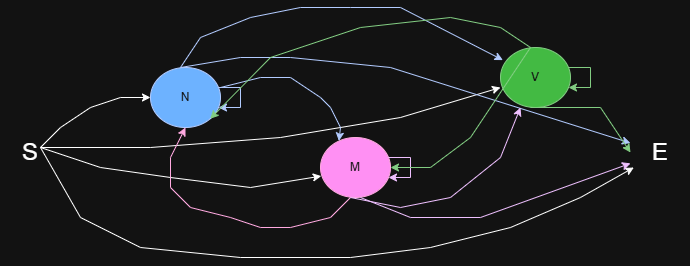


Hidden markov model with the nodes and their interconnection (transitions)

Now we use this model to tag the POS for the sentence
<br>
`` will will google pizza``
<br>
for each word in the sentence, we calculate all the possible permutations of POS, calculate the probability for each using the markov model and then choose the sequence that has the highest probability.

||will|will|google|pizza||probability|
|----|----|----|----|----|----|----|
|S|N|N|N|N|E|0|
|S|N|N|N|M|E|0|
|S|.|.|.|.|E|.|
|S|.|.|.|.|E|.|
S|M|N|V|N|E|!= 0|


Probability  = emmission probability + transition probability

Hence the last value is considered as the POS sequence for the sentence because it has the maximum value.

for the above sentence, we have 81 different combinations

----------------------------------------------------------------------

However, when the number of words in a sentence becomes large, the calculation of all the permutations becomes highly inefficient. The **Viterbi Algorithm** solves this problem by making an optimization to the existing solution






## **Viterbi Algorithm**

The Viterbi algorithm is a dynamic programming algorithm for finding the most likely sequence of hidden states in a Hidden Markov Model (HMM).

Given a series of observed events, the Viterbi algorithm determines the most likely order of hidden states in an HMM.

Andrew Viterbi proposed the algorithm in 1967

The Viterbi algorithm operates by iteratively computing the highest probability paths to each state at each time step, storing these probabilities, and backtracking to determine the most probable sequence of hidden states. This method ensures an efficient and accurate decoding of hidden state sequences, making it indispensable for applications that require precise sequence analysis and pattern recognition.